In [197]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn import linear_model
import math
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.preprocessing import  LabelEncoder ,MinMaxScaler
 

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [198]:
""""
PATH1 = os.path.join(os.getcwd(), os.path.join('data', 'train.csv'))
PATH2= os.path.join(os.getcwd(), os.path.join('data', 'test.csv'))
PATH3=os.path.join(os.getcwd(), os.path.join('data', 'gender_submission.csv'))
train = pd.read_csv(PATH1, delimiter=',')
test_df = pd.read_csv(PATH2, delimiter=',')
gender_submission = pd.read_csv(PATH3, delimiter=',')
train.head()"""

test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
#train.plot(kind='scatter', x='Fare', y='Survived')


In [200]:
all_data = [train, test_df]

In [201]:
for dataset in all_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Sir           1
Lady          1
Don           1
Countess      1
Jonkheer      1
Mme           1
Capt          1
Name: Title, dtype: int64

In [202]:

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [203]:
train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [204]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    
    df.plot(kind='bar',stacked=True, figsize=(10,5))

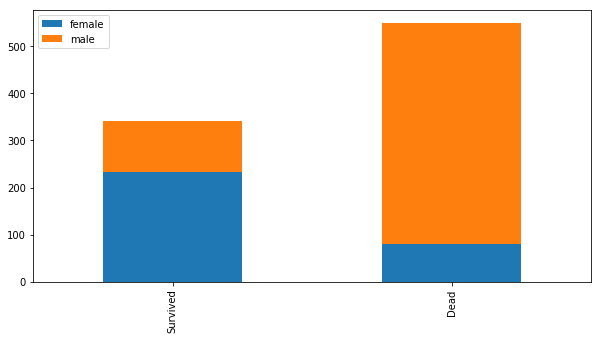

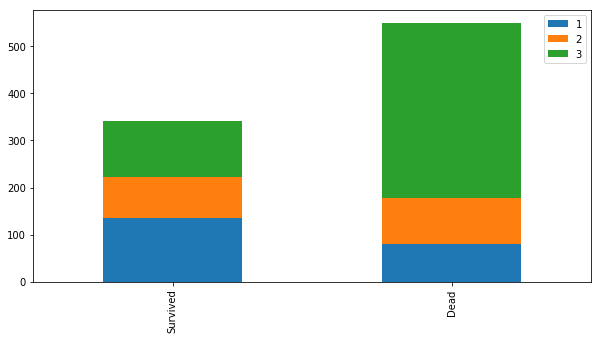

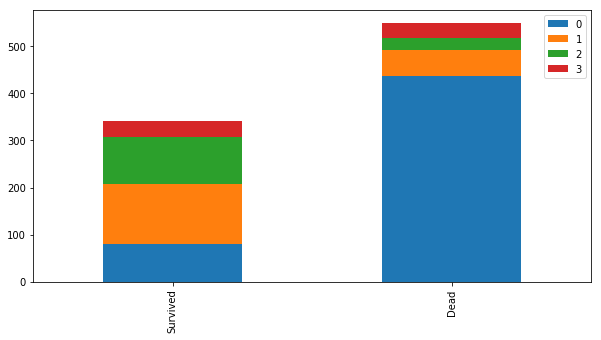

In [205]:
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('Title')


In [206]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
all_data = [X_train, test_df]

In [207]:
for data in all_data:
    data['family_size'] = data['SibSp'] + data['Parch'] +1

In [208]:
all_data_train.head(5)


,Pclass,Sex,Age,Fare,Title,family_size,C,Q,S
0,3,1,22.0,7.2500,0,2,0,0,1
1,1,0,38.0,71.2833,2,2,1,0,0
2,3,0,26.0,7.9250,1,1,0,0,1
3,1,0,35.0,53.1000,2,2,0,0,1
4,3,1,35.0,8.0500,0,1,0,0,1


In [209]:
all_data_train=X_train.drop(["Cabin","SibSp","Parch","Name","PassengerId","Ticket"], axis=1)
all_data_test=test_df.drop(["Cabin","SibSp","Parch","Name","Ticket","PassengerId"], axis=1)

In [210]:
all_data_train.shape,all_data_test.shape

((891, 7), (418, 7))

In [211]:
all_data_train["Fare"] = all_data_train["Fare"].fillna(all_data_train["Fare"].median())
all_data_test["Fare"] = all_data_test["Fare"].fillna(all_data_test["Fare"].median())
all_data_train["Age"] = all_data_train["Age"].fillna(all_data_train["Age"].median())
all_data_test["Age"] = all_data_test["Age"].fillna(all_data_test["Age"].median())
mod = all_data_train.Embarked.value_counts().argmax()
all_data_train.Embarked.fillna(mod, inplace=True)

C:\Users\Elhmadany\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """


In [212]:

LE2 = LabelEncoder()
all_data_train.Sex = LE2.fit_transform(all_data_train.Sex)
all_data_test.Sex = LE2.fit_transform(all_data_test.Sex)

In [213]:
dumies= pd.get_dummies(all_data_train.Embarked)
dumies1=pd.get_dummies(all_data_test.Embarked)

In [214]:
all_data_train=pd.concat([all_data_train,dumies],axis='columns')
all_data_test=pd.concat([all_data_test,dumies1],axis='columns')

In [215]:
all_data_train=all_data_train.drop(['Embarked'],axis=1)
all_data_test=all_data_test.drop(['Embarked'],axis=1)

In [216]:
all_data_train.head(2)

,Pclass,Sex,Age,Fare,Title,family_size,C,Q,S
0,3,1,22.0,7.2500,0,2,0,0,1
1,1,0,38.0,71.2833,2,2,1,0,0


In [217]:
all_data_train.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Title          0
family_size    0
C              0
Q              0
S              0
dtype: int64

In [218]:
all_data_test.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Title          0
family_size    0
C              0
Q              0
S              0
dtype: int64

In [219]:
sc_X = MinMaxScaler()
all_data_train_normalized = sc_X.fit_transform(all_data_train)
all_data_test_normalized = sc_X.transform(all_data_test)

In [220]:
all_data_train_normalized=pd.DataFrame(all_data_train_normalized)
all_data_test_normalized=pd.DataFrame(all_data_test_normalized)


In [221]:
p_test = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(all_data_train_normalized,Y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_


C:\Users\Elhmadany\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.83280, std: 0.01694, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.82381, std: 0.01590, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.81032, std: 0.01924, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.81369, std: 0.01890, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.80584, std: 0.01527, params: {'learning_rate': 0.15, 'n_estimators': 1000},
  mean: 0.80584, std: 0.02022, params: {'learning_rate': 0.15, 'n_estimators': 1250},
  mean: 0.80697, std: 0.01426, params: {'learning_rate': 0.15, 'n_estimators': 1500},
  mean: 0.80362, std: 0.01666, params: {'learning_rate': 0.15, 'n_estimators': 1750},
  mean: 0.83055, std: 0.01053, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.83278, std: 0.02490, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.82153, std: 0.02290, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.81482, std: 0.02264, params: {'learning_rate': 0.1, 'n

In [190]:
GB=GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10, 
          learning_rate= 0.01, n_estimators= 1250)

In [222]:
GB.fit(all_data_train_normalized,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1250,
              presort='auto', random_state=10, subsample=1, verbose=0,
              warm_start=False)

In [223]:
pred = GB.predict(all_data_test_normalized)
pred =pd.DataFrame(pred,columns=['Survived'])

sub0 = pd.concat([test_df['PassengerId'],pred],axis=1)
sub0.to_csv('sub0.csv',index=False)

In [225]:
sub0.shape

(418, 2)